***Libraries***

In [77]:
%pip install seaborn



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

***Data Preprocessing***

In [79]:
data=pd.read_csv('dataset_sdn.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [80]:
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [81]:
data.label.unique()

array([0, 1], dtype=int64)

***Missing values***

In [82]:
data.isna().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [83]:
data.dropna(inplace=True)

In [84]:
data.isna().sum()

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [85]:
data.duplicated().sum()

5091

In [86]:
data2 = data.drop_duplicates()

In [87]:
data2.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,98748.000000,98748.000000,98748.000000,9.874800e+04,98748.000000,9.874800e+04,9.874800e+04,98748.000000,98748.000000,98748.000000,9.874800e+04,98748.000000,98748.000000,98748.000000,9.874800e+04,9.874800e+04,98748.000000,98748.000000,98748.000000,98748.000000
mean,18479.644023,4.247823,51941.104296,3.621792e+07,329.000699,4.587211e+08,3.293856e+11,5.774993,5346.777727,6189.126311,4.397165e+06,205.787277,0.635051,2.326214,9.756356e+07,9.725369e+07,1039.010319,1033.235306,2072.245625,0.382043
std,12045.554712,1.969779,52439.716263,4.834092e+07,288.148309,2.784332e+08,2.880307e+11,2.967114,5348.358505,7500.568901,7.573802e+06,250.049982,0.481418,1.079307,1.538725e+08,1.336356e+08,2468.447244,2070.535240,3179.364227,0.485889
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7147.000000,3.000000,759.000000,7.477400e+04,130.000000,2.280000e+08,1.310000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,5.139000e+03,3.833000e+03,0.000000,0.000000,0.000000,0.000000
50%,14495.000000,4.000000,40013.000000,5.751864e+06,257.000000,4.140000e+08,2.580000e+11,5.000000,3024.000000,8188.000000,5.185200e+05,272.000000,1.000000,2.000000,6.118949e+06,2.036065e+07,0.000000,1.000000,6.000000,0.000000
75%,30312.000000,5.000000,93296.000000,7.041356e+07,422.000000,6.990000e+08,4.230000e+11,7.000000,7894.000000,9899.000000,9.631206e+06,329.000000,1.000000,3.000000,1.358509e+08,1.457056e+08,271.000000,690.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [88]:
data2.head(5)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [120]:
print(data['label'].value_counts())  # Replace 'label' with the name of your target column


label
0    63335
1    40504
Name: count, dtype: int64


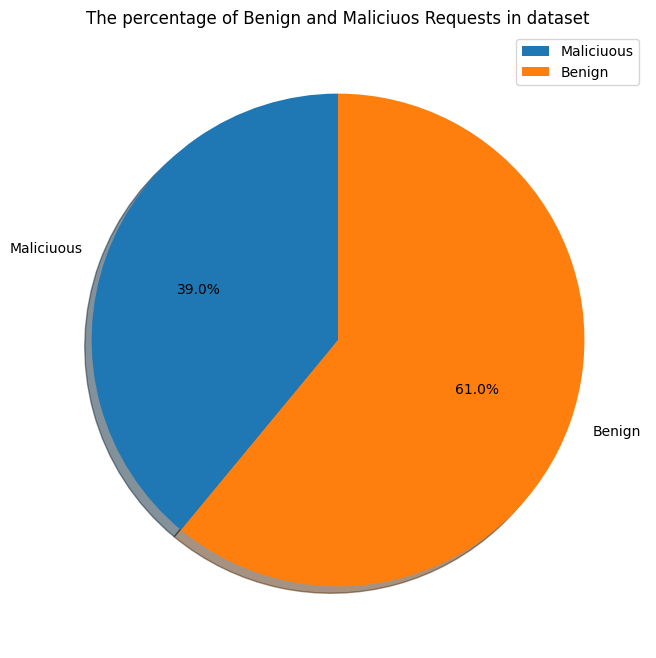

In [89]:
labels = ["Maliciuous",'Benign']
sizes = [dict(data.label.value_counts())[1], dict(data.label.value_counts())[0]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["Maliciuous", "Benign"])
plt.title('The percentage of Benign and Maliciuos Requests in dataset')
plt.show()

In [61]:
%pip install imbalanced-learn 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
from  imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [91]:
X=data.drop(columns=['label'])
Y=data['label']

In [92]:
print("Original Class Distribution",Counter(Y))

Original Class Distribution Counter({0: 63335, 1: 40504})


In [93]:
ros=RandomOverSampler(random_state=42)
X_res,Y_res=ros.fit_resample(X,Y)

print("Resampled Class Dustribution",Counter(Y_res))

Resampled Class Dustribution Counter({0: 63335, 1: 63335})


In [14]:

numeric_df = data.select_dtypes(include=['int64', 'float64'])
object_df = data.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

Object Columns: 
Index(['src', 'dst', 'Protocol'], dtype='object') 

Number of Numeric Features:  20
Number of Object Features:  3


In [99]:
object_df.head()

,src,dst,Protocol
0,10.0.0.1,10.0.0.8,UDP
1,10.0.0.1,10.0.0.8,UDP
2,10.0.0.2,10.0.0.8,UDP
3,10.0.0.2,10.0.0.8,UDP
4,10.0.0.2,10.0.0.8,UDP


In [15]:
data2.describe(include = 'all')

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,98748.000000,98748.000000,98748,98748,98748.000000,9.874800e+04,98748.000000,9.874800e+04,9.874800e+04,98748.000000,...,98748.000000,98748.000000,98748,98748.000000,9.874800e+04,9.874800e+04,98748.000000,98748.000000,98748.000000,98748.000000
unique,NaN,NaN,19,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,10.0.0.3,10.0.0.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,ICMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,10996,16333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,41321,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,18479.644023,4.247823,NaN,NaN,51941.104296,3.621792e+07,329.000699,4.587211e+08,3.293856e+11,5.774993,...,205.787277,0.635051,NaN,2.326214,9.756356e+07,9.725369e+07,1039.010319,1033.235306,2072.245625,0.382043
std,12045.554712,1.969779,NaN,NaN,52439.716263,4.834092e+07,288.148309,2.784332e+08,2.880307e+11,2.967114,...,250.049982,0.481418,NaN,1.079307,1.538725e+08,1.336356e+08,2468.447244,2070.535240,3179.364227,0.485889
min,2488.000000,1.000000,NaN,NaN,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,...,-4365.000000,0.000000,NaN,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7147.000000,3.000000,NaN,NaN,759.000000,7.477400e+04,130.000000,2.280000e+08,1.310000e+11,3.000000,...,0.000000,0.000000,NaN,1.000000,5.139000e+03,3.833000e+03,0.000000,0.000000,0.000000,0.000000
50%,14495.000000,4.000000,NaN,NaN,40013.000000,5.751864e+06,257.000000,4.140000e+08,2.580000e+11,5.000000,...,272.000000,1.000000,NaN,2.000000,6.118949e+06,2.036065e+07,0.000000,1.000000,6.000000,0.000000
75%,30312.000000,5.000000,NaN,NaN,93296.000000,7.041356e+07,422.000000,6.990000e+08,4.230000e+11,7.000000,...,329.000000,1.000000,NaN,3.000000,1.358509e+08,1.457056e+08,271.000000,690.000000,3838.000000,1.000000


In [16]:
data3 = data2.sort_values(['src','dt'],ascending= False ). groupby('src')

In [17]:
counts = data2.sort_values(['src','dt'],ascending= False ). groupby('src').count()

In [18]:
counts

,dt,switch,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
src,,,,,,,,,,,,,,,,,,,,,
10.0.0.1,7846,7846,7846,7846,7846,7846,7846,7846,7846,7846,...,7846,7846,7846,7846,7846,7846,7846,7846,7846,7846
10.0.0.10,8414,8414,8414,8414,8414,8414,8414,8414,8414,8414,...,8414,8414,8414,8414,8414,8414,8414,8414,8414,8414
10.0.0.11,5813,5813,5813,5813,5813,5813,5813,5813,5813,5813,...,5813,5813,5813,5813,5813,5813,5813,5813,5813,5813
10.0.0.12,7739,7739,7739,7739,7739,7739,7739,7739,7739,7739,...,7739,7739,7739,7739,7739,7739,7739,7739,7739,7739
10.0.0.13,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276,...,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276
10.0.0.14,2265,2265,2265,2265,2265,2265,2265,2265,2265,2265,...,2265,2265,2265,2265,2265,2265,2265,2265,2265,2265
10.0.0.15,1858,1858,1858,1858,1858,1858,1858,1858,1858,1858,...,1858,1858,1858,1858,1858,1858,1858,1858,1858,1858
10.0.0.16,1789,1789,1789,1789,1789,1789,1789,1789,1789,1789,...,1789,1789,1789,1789,1789,1789,1789,1789,1789,1789
10.0.0.17,980,980,980,980,980,980,980,980,980,980,...,980,980,980,980,980,980,980,980,980,980


In [19]:
data3["src"].value_counts()

src
10.0.0.1      7846
10.0.0.10     8414
10.0.0.11     5813
10.0.0.12     7739
10.0.0.13     2276
10.0.0.14     2265
10.0.0.15     1858
10.0.0.16     1789
10.0.0.17      980
10.0.0.18     2230
10.0.0.2      7587
10.0.0.20      906
10.0.0.3     10996
10.0.0.4      5651
10.0.0.5      7175
10.0.0.6      2581
10.0.0.7     10291
10.0.0.8      5210
10.0.0.9      7141
Name: count, dtype: int64

In [111]:
categorical_columns = ['src', 'dst', 'Protocol']  # Example categorical columns

In [112]:
for col in categorical_columns:
    print(f"{col}: {data[col].nunique()} unique values")


src: 19 unique values
dst: 18 unique values
Protocol: 3 unique values


In [115]:
from sklearn.preprocessing import OneHotEncoder

# Updated initialization with `sparse_output`
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform
encoded_cats = one_hot_encoder.fit_transform(data[categorical_columns])
encoded_cat_columns = one_hot_encoder.get_feature_names_out(categorical_columns)

# Convert to DataFrame and merge
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoded_cat_columns, index=data.index)
data = pd.concat([data.drop(columns=categorical_columns), encoded_cats_df], axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [116]:
y = data2['label']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [117]:
data2

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


In [118]:
data2.select_dtypes(include=["object"]).columns

Index(['src', 'dst', 'Protocol'], dtype='object')

In [119]:
data2["src"].value_counts()

src
10.0.0.3     10996
10.0.0.7     10291
10.0.0.10     8414
10.0.0.1      7846
10.0.0.12     7739
10.0.0.2      7587
10.0.0.5      7175
10.0.0.9      7141
10.0.0.11     5813
10.0.0.4      5651
10.0.0.8      5210
10.0.0.6      2581
10.0.0.13     2276
10.0.0.14     2265
10.0.0.18     2230
10.0.0.15     1858
10.0.0.16     1789
10.0.0.17      980
10.0.0.20      906
Name: count, dtype: int64

In [50]:
def getSrc(txt):

    if(len(txt) > 7):
        try :
            return int(txt[7:])
        except :
            return None
    return None

data2["newSource"] = data2["src"].apply(getSrc)
data2["newDest"] = data2["dst"].apply(getSrc)


C:\Users\HP\AppData\Local\Temp\ipykernel_16096\3387754674.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["newSource"] = data2["src"].apply(getSrc)
C:\Users\HP\AppData\Local\Temp\ipykernel_16096\3387754674.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["newDest"] = data2["dst"].apply(getSrc)


In [51]:
data2

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label,newSource,newDest
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,UDP,3,143928631,3917,0,0.0,0.0,0,1,8
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,UDP,4,3842,3520,0,0.0,0.0,0,1,8
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,UDP,1,3795,1242,0,0.0,0.0,0,2,8
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,UDP,2,3688,1492,0,0.0,0.0,0,2,8
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,UDP,3,3413,3665,0,0.0,0.0,0,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,ICMP,1,15209,12720,1,1.0,2.0,0,5,7
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,ICMP,3,15099,14693,1,1.0,2.0,0,5,7
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,ICMP,2,3409,3731,0,0.0,0.0,0,11,5
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,ICMP,1,15209,12720,1,1.0,2.0,0,11,5


In [53]:
data2["Protocol"].value_counts()

Protocol
ICMP    41321
TCP     29436
UDP     27991
Name: count, dtype: int64

In [56]:
le = LabelEncoder()

In [57]:
data2["Protocol"] = le.fit_transform(data2["Protocol"])

C:\Users\HP\AppData\Local\Temp\ipykernel_16096\2500921628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Protocol"] = le.fit_transform(data2["Protocol"])


In [59]:
data2["Protocol"].value_counts()

Protocol
0    41321
1    29436
2    27991
Name: count, dtype: int64

In [61]:
corr = data2.corr(numeric_only=True)
corr

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label,newSource,newDest
dt,1.000000,-0.019214,-0.169154,-0.275857,0.259903,-0.169040,0.259707,0.309120,0.024081,-0.223604,...,-0.562182,-0.019050,0.061912,0.074215,-0.045535,-0.051221,-0.068710,-0.097635,-0.094296,0.019634
switch,-0.019214,1.000000,-0.052818,-0.162861,-0.032383,-0.077520,-0.032510,-0.040283,0.194810,-0.027596,...,-0.086075,-0.003792,-0.062584,-0.072710,-0.039342,-0.047445,-0.061443,0.029019,0.361165,0.351852
pktcount,-0.169154,-0.052818,1.000000,0.663498,0.015888,0.030786,0.015943,-0.254017,0.291024,0.475078,...,0.447400,0.001254,0.032644,0.036287,0.007368,0.006858,0.010187,0.415682,0.059381,-0.085661
bytecount,-0.275857,-0.162861,0.663498,1.000000,0.039911,0.021880,0.039901,-0.228650,-0.110961,0.328870,...,0.457055,-0.018755,0.023956,0.025151,0.063547,0.072457,0.096524,0.282435,-0.033354,-0.176019
dur,0.259903,-0.032383,0.015888,0.039911,1.000000,-0.054248,0.999998,0.165752,-0.142460,-0.324994,...,-0.461991,0.002191,0.143891,0.166737,-0.150559,-0.178369,-0.233055,-0.101337,-0.055995,-0.028115
dur_nsec,-0.169040,-0.077520,0.030786,0.021880,-0.054248,1.000000,-0.052901,-0.006824,-0.055148,0.039005,...,0.105543,0.018091,0.013934,0.015828,-0.031546,-0.038552,-0.049599,0.028328,0.049395,0.013901
tot_dur,0.259707,-0.032510,0.015943,0.039901,0.999998,-0.052901,1.000000,0.165752,-0.142538,-0.324978,...,-0.461938,0.002225,0.143937,0.166791,-0.150637,-0.178463,-0.233177,-0.101342,-0.055975,-0.028116
flows,0.309120,-0.040283,-0.254017,-0.228650,0.165752,-0.006824,0.165752,1.000000,0.028504,-0.204026,...,-0.510676,0.038346,0.154194,0.179048,0.149938,0.180007,0.233639,-0.176194,-0.059849,0.023976
packetins,0.024081,0.194810,0.291024,-0.110961,-0.142460,-0.055148,-0.142538,0.028504,1.000000,0.204079,...,0.152116,0.005643,0.093425,0.106788,0.029710,0.034142,0.045302,0.003878,0.104990,0.132612
pktperflow,-0.223604,-0.027596,0.475078,0.328870,-0.324994,0.039005,-0.324978,-0.204026,0.204079,1.000000,...,0.495290,-0.000706,-0.041089,-0.049144,0.114784,0.134272,0.176561,0.107546,0.049071,-0.033640


<Axes: >

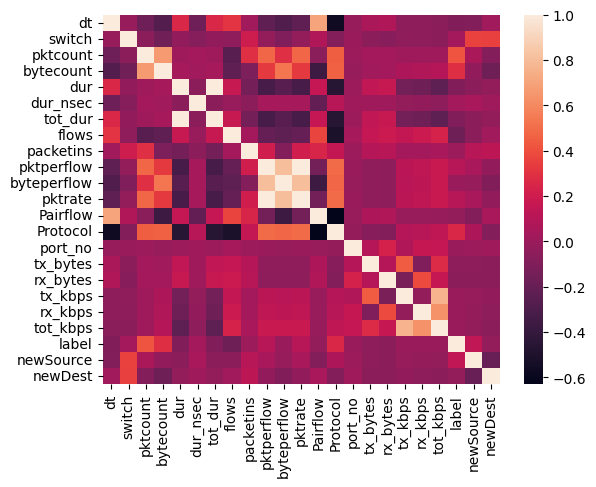

In [62]:
sns.heatmap(corr)

In [64]:
target = "label"
target_corr = corr[target]
target_corr

dt            -0.097635
switch         0.029019
pktcount       0.415682
bytecount      0.282435
dur           -0.101337
dur_nsec       0.028328
tot_dur       -0.101342
flows         -0.176194
packetins      0.003878
pktperflow     0.107546
byteperflow   -0.004189
pktrate        0.107735
Pairflow      -0.029133
Protocol       0.254952
port_no       -0.005982
tx_bytes      -0.047163
rx_bytes      -0.054962
tx_kbps       -0.002059
rx_kbps       -0.002350
tot_kbps      -0.003129
label          1.000000
newSource      0.143021
newDest       -0.027511
Name: label, dtype: float64

In [71]:
target_corr["newSource"]

0.14302113879880074

In [78]:
high_corr = []

for col in target_corr.index:

    if( abs(target_corr[col]) >= 0.1):
        high_corr.append(col)
high_corr

['pktcount',
 'bytecount',
 'dur',
 'tot_dur',
 'flows',
 'pktperflow',
 'pktrate',
 'Protocol',
 'label',
 'newSource']

In [79]:
high_corr

['pktcount',
 'bytecount',
 'dur',
 'tot_dur',
 'flows',
 'pktperflow',
 'pktrate',
 'Protocol',
 'label',
 'newSource']

In [ ]:
data

In [124]:
categorical_columns = ['src', 'dst', 'Protocol']  # Replace with actual categorical column names

In [125]:
from sklearn.preprocessing import StandardScaler

numerical_columns = [col for col in data.columns if col not in categorical_columns + ['label']]
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [126]:
X = data.drop(columns=['label'])
y = data['label']
